# Multiclass classification using a neural network

Here we adopt a 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, train_test_split, KFold

Using TensorFlow backend.


In [2]:
matrix = pd.read_csv('model/1129-fixed-data-matrix-karlgren.csv').set_index('character')

In [3]:
cols = matrix.columns
features_cols = [c for c in cols if 'Karlgren' not in c and 'tone_label' not in c]
labels_cols = [c for c in cols if c not in features_cols]

In [4]:
X_complete = matrix[features_cols]
Y_complete = matrix[labels_cols]

In [31]:
label_categories = [
    'tone_label',
    'Karlgren_onset',
    'Karlgren_nucleus',
    'Karlgren_coda'
]

In [133]:
def fit_keras_models(X, Y, architecture, n_epochs=200, n_folds=5):
    category_to_performance = defaultdict(list)
    category_to_callbacks = defaultdict(list)
    
    for category in label_categories:
        Y_subset = Y[[x for x in Y.columns if category in x]]
        n_bins = Y_subset.shape[1]
        
        def build_keras_nn_model():
            model = Sequential()
            model.add(Dense(
                architecture[0][0],
                input_dim=X.shape[1],
                activation=architecture[0][1])
            )
            
            if len(architecture) > 1:
                for l, (hidden_layer_size, act_fn) in enumerate(architecture[1:]):
                    model.add(Dense(
                        hidden_layer_size,
                        input_dim=architecture[l - 1],
                        activation=act_fn)
                    )
                    
            model.add(Dense(n_bins, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            return model
        
        KerasNN = KerasClassifier(
            build_fn=build_keras_nn_model,
            epochs=n_epochs,
            batch_size=256,
            verbose=True
        )
        
        kf = KFold(n_splits=n_folds, random_state=0, shuffle=False)
        for kf_idx, (train_idx, dev_idx) in enumerate(kf.split(X)):
            X_train, X_dev = X.iloc[train_idx], X.iloc[dev_idx]
            Y_train, Y_dev = Y_subset.iloc[train_idx], Y_subset.iloc[dev_idx]
            
            hist_callback = KerasNN.fit(
                X_train,
                Y_train,
                validation_data=(X_dev, Y_dev)
            )
            
            category_to_callbacks[category].append(hist_callback)
            dev_score = KerasNN.score(X_dev, Y_dev)
            category_to_performance[category].append(dev_score)
            
            print('Category: {:16s}\tCV: {} of {}\tDev performance: {:.3f}'.format(
                category, kf_idx + 1, n_folds, float(dev_score)))
    return category_to_performance, category_to_callbacks

In [134]:
N_EPOCHS = 15
N_FOLDS = 5
ARCHITECTURE = [
    (32, 'relu'),
    (32, 'relu'),
    (32, 'relu')
]

performance, callbacks = fit_keras_models(
    X_complete,
    Y_complete,
    architecture=ARCHITECTURE,
    n_epochs=N_EPOCHS,
    n_folds=N_FOLDS
)

Train on 12200 samples, validate on 3050 samples
Epoch 1/15
12200/12200 [==============================] - 14s 1ms/step - loss: 1.1699 - acc: 0.4809 - val_loss: 1.1203 - val_acc: 0.5295
Epoch 2/15
12200/12200 [==============================] - 1s 48us/step - loss: 0.6536 - acc: 0.7609 - val_loss: 0.8132 - val_acc: 0.6957
Epoch 3/15
12200/12200 [==============================] - 1s 58us/step - loss: 0.5053 - acc: 0.8254 - val_loss: 0.7623 - val_acc: 0.7007
Epoch 4/15
12200/12200 [==============================] - 1s 52us/step - loss: 0.4779 - acc: 0.8301 - val_loss: 0.7520 - val_acc: 0.7007
Epoch 5/15
12200/12200 [==============================] - 1s 43us/step - loss: 0.4655 - acc: 0.8325 - val_loss: 0.7439 - val_acc: 0.7000
Epoch 6/15
12200/12200 [==============================] - 1s 53us/step - loss: 0.4578 - acc: 0.8360 - val_loss: 0.7432 - val_acc: 0.7013
Epoch 7/15
12200/12200 [==============================] - 1s 53us/step - loss: 0.4489 - acc: 0.8389 - val_loss: 0.7415 - val_acc:

Epoch 6/15
12200/12200 [==============================] - 1s 47us/step - loss: 1.1434 - acc: 0.6797 - val_loss: 1.0412 - val_acc: 0.7239
Epoch 7/15
12200/12200 [==============================] - 1s 46us/step - loss: 1.0870 - acc: 0.6920 - val_loss: 1.0150 - val_acc: 0.7321
Epoch 8/15
12200/12200 [==============================] - 1s 47us/step - loss: 1.0501 - acc: 0.6996 - val_loss: 0.9842 - val_acc: 0.7393
Epoch 9/15
12200/12200 [==============================] - 1s 47us/step - loss: 1.0220 - acc: 0.7020 - val_loss: 0.9747 - val_acc: 0.7426
Epoch 10/15
12200/12200 [==============================] - 1s 46us/step - loss: 1.0011 - acc: 0.7086 - val_loss: 0.9665 - val_acc: 0.7462
Epoch 11/15
12200/12200 [==============================] - 1s 47us/step - loss: 0.9850 - acc: 0.7120 - val_loss: 0.9564 - val_acc: 0.7443
Epoch 12/15
12200/12200 [==============================] - 1s 47us/step - loss: 0.9695 - acc: 0.7150 - val_loss: 0.9479 - val_acc: 0.7475
Epoch 13/15
12200/12200 [=============

12200/12200 [==============================] - 14s 1ms/step - loss: 3.9715 - acc: 0.0942 - val_loss: 3.6348 - val_acc: 0.1075
Epoch 2/15
12200/12200 [==============================] - 1s 52us/step - loss: 3.2747 - acc: 0.1957 - val_loss: 2.7904 - val_acc: 0.2744
Epoch 3/15
12200/12200 [==============================] - 1s 51us/step - loss: 2.5159 - acc: 0.3432 - val_loss: 2.0928 - val_acc: 0.4325
Epoch 4/15
12200/12200 [==============================] - 1s 51us/step - loss: 1.9329 - acc: 0.4938 - val_loss: 1.6431 - val_acc: 0.5597
Epoch 5/15
12200/12200 [==============================] - 1s 51us/step - loss: 1.5932 - acc: 0.5684 - val_loss: 1.4245 - val_acc: 0.6164
Epoch 6/15
12200/12200 [==============================] - 1s 51us/step - loss: 1.4158 - acc: 0.6089 - val_loss: 1.3187 - val_acc: 0.6489
Epoch 7/15
12200/12200 [==============================] - 1s 51us/step - loss: 1.3148 - acc: 0.6303 - val_loss: 1.2618 - val_acc: 0.6580
Epoch 8/15
12200/12200 [============================

12200/12200 [==============================] - 1s 53us/step - loss: 1.0948 - acc: 0.6813 - val_loss: 1.1992 - val_acc: 0.6702
Epoch 13/15
12200/12200 [==============================] - 1s 55us/step - loss: 1.0726 - acc: 0.6875 - val_loss: 1.1857 - val_acc: 0.6705
Epoch 14/15
12200/12200 [==============================] - 1s 63us/step - loss: 1.0559 - acc: 0.6864 - val_loss: 1.1903 - val_acc: 0.6725
Epoch 15/15
3050/3050 [==============================] - 0s 30us/step
Category: Karlgren_nucleus	CV: 5 of 5	Dev performance: 0.675
Train on 12200 samples, validate on 3050 samples
Epoch 1/15
12200/12200 [==============================] - 15s 1ms/step - loss: 1.7871 - acc: 0.4102 - val_loss: 1.5103 - val_acc: 0.5584
Epoch 2/15
12200/12200 [==============================] - 1s 44us/step - loss: 0.8214 - acc: 0.7842 - val_loss: 0.7644 - val_acc: 0.8557
Epoch 3/15
12200/12200 [==============================] - 1s 43us/step - loss: 0.3719 - acc: 0.9089 - val_loss: 0.4931 - val_acc: 0.9154
Epoch 4

Epoch 7/15
12200/12200 [==============================] - 1s 43us/step - loss: 0.2434 - acc: 0.9305 - val_loss: 0.2460 - val_acc: 0.9285
Epoch 8/15
12200/12200 [==============================] - 1s 42us/step - loss: 0.2333 - acc: 0.9305 - val_loss: 0.2471 - val_acc: 0.9272
Epoch 9/15
12200/12200 [==============================] - 1s 44us/step - loss: 0.2253 - acc: 0.9323 - val_loss: 0.2471 - val_acc: 0.9272
Epoch 10/15
12200/12200 [==============================] - 1s 50us/step - loss: 0.2188 - acc: 0.9332 - val_loss: 0.2441 - val_acc: 0.9311
Epoch 11/15
12200/12200 [==============================] - 1s 45us/step - loss: 0.2142 - acc: 0.9343 - val_loss: 0.2431 - val_acc: 0.9321
Epoch 12/15
12200/12200 [==============================] - 1s 48us/step - loss: 0.2095 - acc: 0.9346 - val_loss: 0.2421 - val_acc: 0.9305
Epoch 13/15
12200/12200 [==============================] - 1s 50us/step - loss: 0.2049 - acc: 0.9354 - val_loss: 0.2473 - val_acc: 0.9321
Epoch 14/15
12200/12200 [============

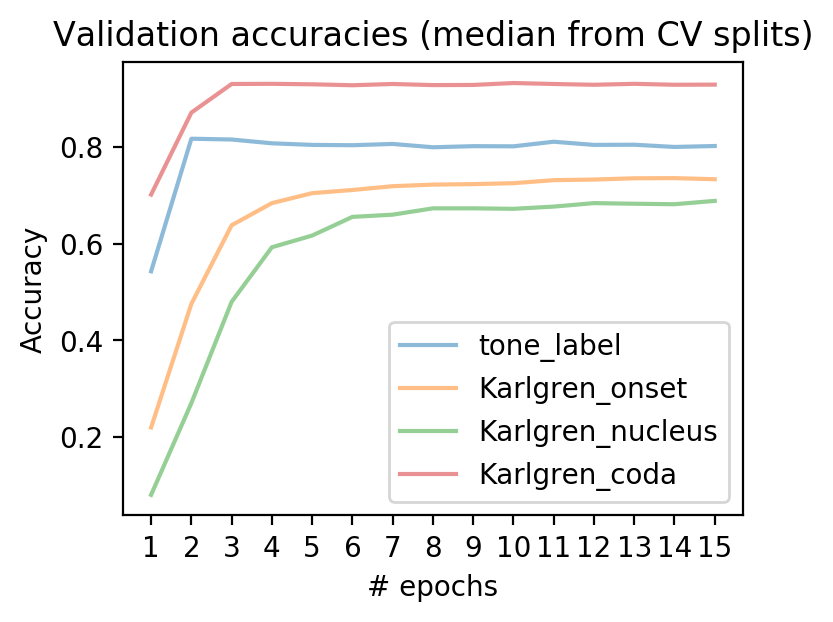

In [138]:
MODE = 'median'
# MODE = 'best'

plt.figure(figsize=(4,3), dpi=200)
plt.title('Validation accuracies (' + MODE + ' from CV splits)')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
xrange = range(1, N_EPOCHS + 1)
plt.xticks(xrange, xrange)
for category in label_categories:
    if MODE == 'median':
        run_idx = performance[category].index(sorted(performance[category])[len(performance[category]) // 2])
    else:
        run_idx = performance[category].index(max(performance[category]))
    hist = callbacks[category][run_idx].history
    plt.plot(xrange, hist['val_acc'], label=category, alpha=.5)
plt.legend(loc='lower right')
plt.show()

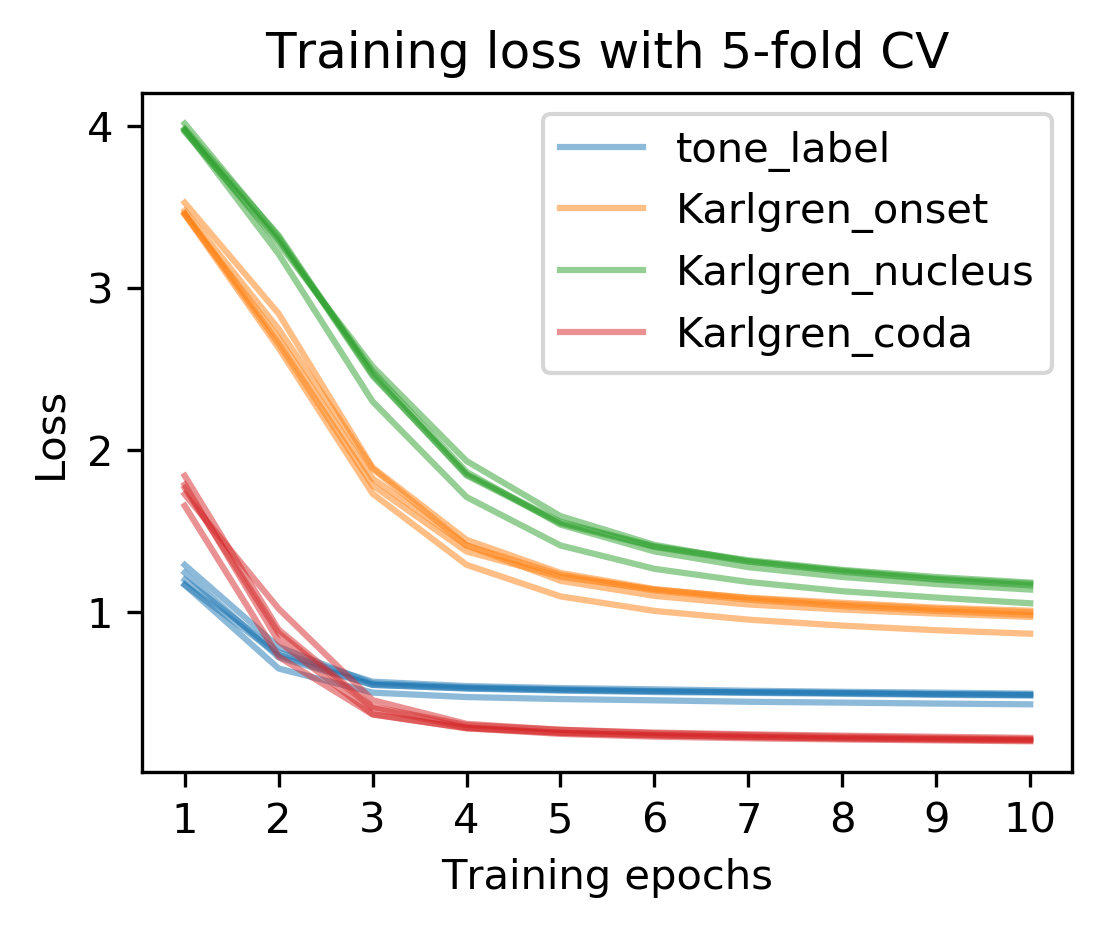

In [173]:
plt.figure(figsize=(4,3), dpi=300)
plt.title('Training loss with 5-fold CV')
plt.xlabel('Training epochs')
plt.ylabel('Loss')
xrange = range(1, N_EPOCHS + 1 - 5)
plt.xticks(xrange, xrange)
for idx, category in enumerate(label_categories):
    for fold in range(N_FOLDS):
        val_acc = callbacks[category][fold].history['loss'][:-5]
        if not fold: 
            plt.plot(xrange, val_acc, label=category, color='C' + str(idx), alpha=.5)
        else:
            plt.plot(xrange, val_acc, label='__nolegend__', color='C' + str(idx), alpha=.5)
plt.legend()
plt.show()